In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats

In [4]:
# 일정하게 0부터 100까지 총 101개 숫자를 만든다
xs = np.array(np.linspace(start=0, stop=100, num=101))
# xs = np.array([3,30,35,40,45,48,49,50,51,52,53,55,60,65,90,95])
df = pd.DataFrame(xs, columns=['feature1'])
df

,feature1
0,0.0
1,1.0
2,2.0
3,3.0
4,4.0
...,...
96,96.0
97,97.0
98,98.0
99,99.0


In [5]:
zscore_threshold = 1.8 # zscore outliers 임계값
# outliers를 출력한다
df[(np.abs(stats.zscore(df)) > zscore_threshold).all(axis=1)].values.ravel()

array([], dtype=float64)

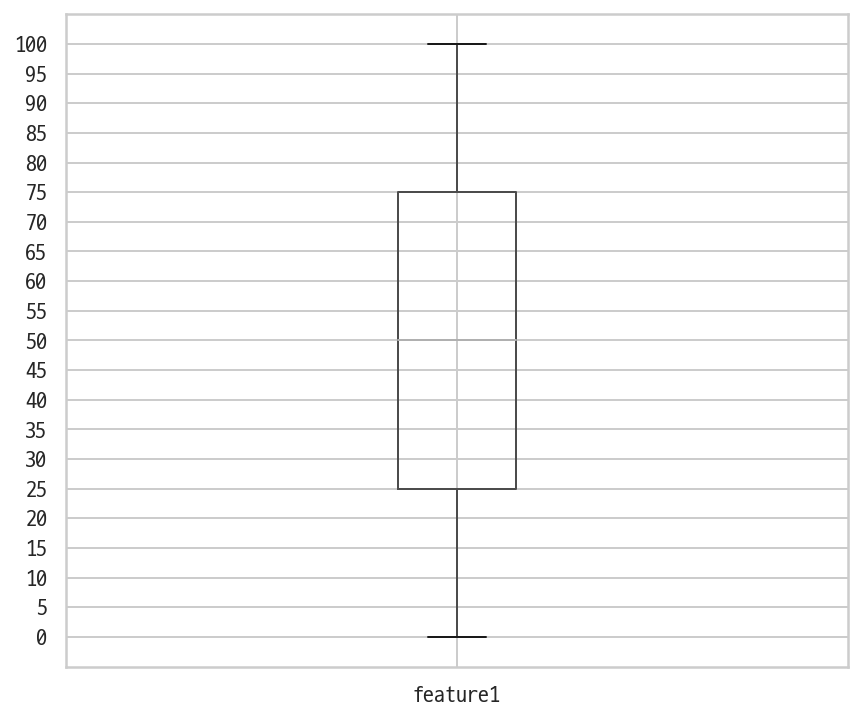

In [6]:
# outliers제외하고 최소값, 백분위25, 백분위50, 백분위75, 최대값을 출력한다
np.percentile(df[(np.abs(stats.zscore(df)) < zscore_threshold).all(axis=1)].values.ravel(),\
              [0, 25, 50, 75, 100], interpolation='nearest')
plt.figure(figsize=(7, 6)) # 크기 지정
boxplot = df.boxplot(column=['feature1'])
plt.yticks(np.arange(0, 101, step=5))
plt.show()